In [2]:
import torch
import torch.nn as nn
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [4]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [5]:
y = 2*X + 1 + e

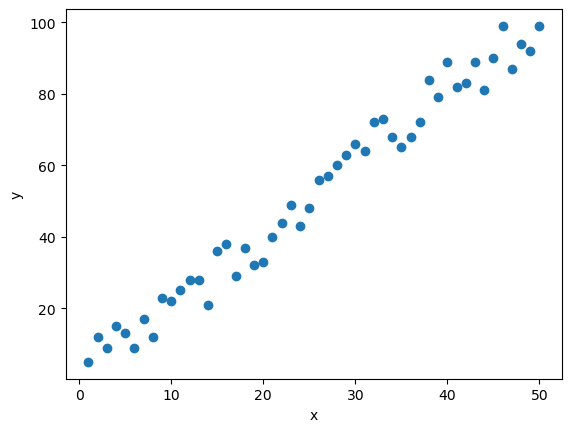

In [6]:
plt.scatter(X, y)
plt.ylabel('y')
plt.xlabel('x');

In [7]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):  
        super().__init__()      
        self.linear = nn.Linear(in_features, out_features)   
        
    def forward(self, x):    
        y_pred = self.linear(x)
        return y_pred

In [8]:
torch.manual_seed(59)
model = Model(1, 1)

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [10]:
epochs = 50 
losses = []
for i in range(epochs):
    i = i +1 
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    print(f'epoch: {i}  loss: {loss.item()}  weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    

epoch: 1  loss: 3057.216796875  weight: 0.10597813129425049 bias: 0.9637961387634277
epoch: 2  loss: 1588.5311279296875  weight: 3.334900379180908 bias: 1.0604636669158936
epoch: 3  loss: 830.2999877929688  weight: 1.0148327350616455 bias: 0.9922628402709961
epoch: 4  loss: 438.8524169921875  weight: 2.6817996501922607 bias: 1.0425218343734741
epoch: 5  loss: 236.7615203857422  weight: 1.4840211868286133 bias: 1.0076650381088257
epoch: 6  loss: 132.4291229248047  weight: 2.3446059226989746 bias: 1.0339646339416504
epoch: 7  loss: 78.56572723388672  weight: 1.7262253761291504 bias: 1.0163217782974243
epoch: 8  loss: 50.75775909423828  weight: 2.170504093170166 bias: 1.0302516222000122
epoch: 9  loss: 36.4012336730957  weight: 1.8512457609176636 bias: 1.0214954614639282
epoch: 10  loss: 28.989229202270508  weight: 2.0806007385253906 bias: 1.029038906097412
epoch: 11  loss: 25.162382125854492  weight: 1.9157683849334717 bias: 1.0248701572418213
epoch: 12  loss: 23.186473846435547  weight:

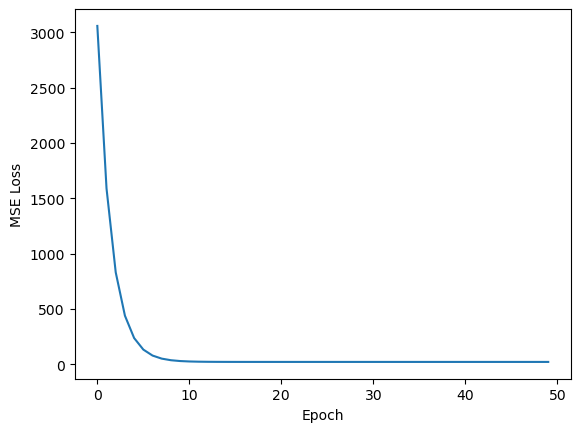

In [11]:
plt.plot(range(epochs), losses)

plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.show()

In [12]:
x = np.linspace(0.0,50.0,50)

current_weight = model.linear.weight.item()

current_bias = model.linear.bias.item()

predicted_y = current_weight * x + current_bias

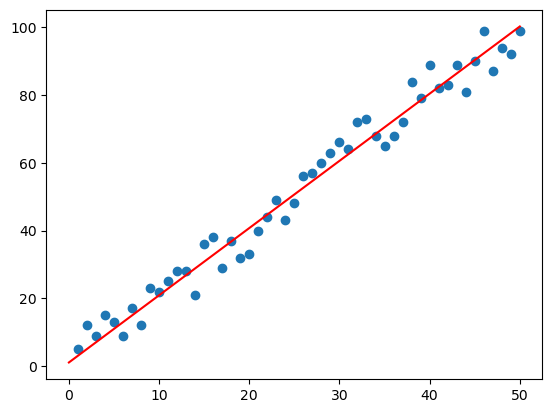

In [13]:
plt.scatter(X, y)

plt.plot(x,predicted_y, 'r')